## Unit 13.10: Reloading and Verifying the Professional Dataset

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# 1. අලුත් සහ නිවැරදි Dataset එක Load කිරීම
file_path = '../data/aura_fitness_final.csv'
df = pd.read_csv(file_path)


In [14]:
# 2. දත්තවල මූලික තොරතුරු බලමු
print("--- Dataset Information ---")
df.info()

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_ID          5000 non-null   object 
 1   Age              5000 non-null   int64  
 2   Gender           5000 non-null   object 
 3   Daily_Steps      4758 non-null   float64
 4   Workout_Min      4735 non-null   float64
 5   Calories_Burned  4741 non-null   float64
 6   Sleep_Hrs        4763 non-null   float64
 7   Protein_Intake   4758 non-null   float64
 8   Water_Intake     4756 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 351.7+ KB


In [15]:
# 3. හිස් තැන් (NaN) ප්‍රමාණය පරීක්ෂා කරමු
print("\n--- Missing Values Count ---")
df.isnull().sum()


--- Missing Values Count ---


User_ID              0
Age                  0
Gender               0
Daily_Steps        242
Workout_Min        265
Calories_Burned    259
Sleep_Hrs          237
Protein_Intake     242
Water_Intake       244
dtype: int64

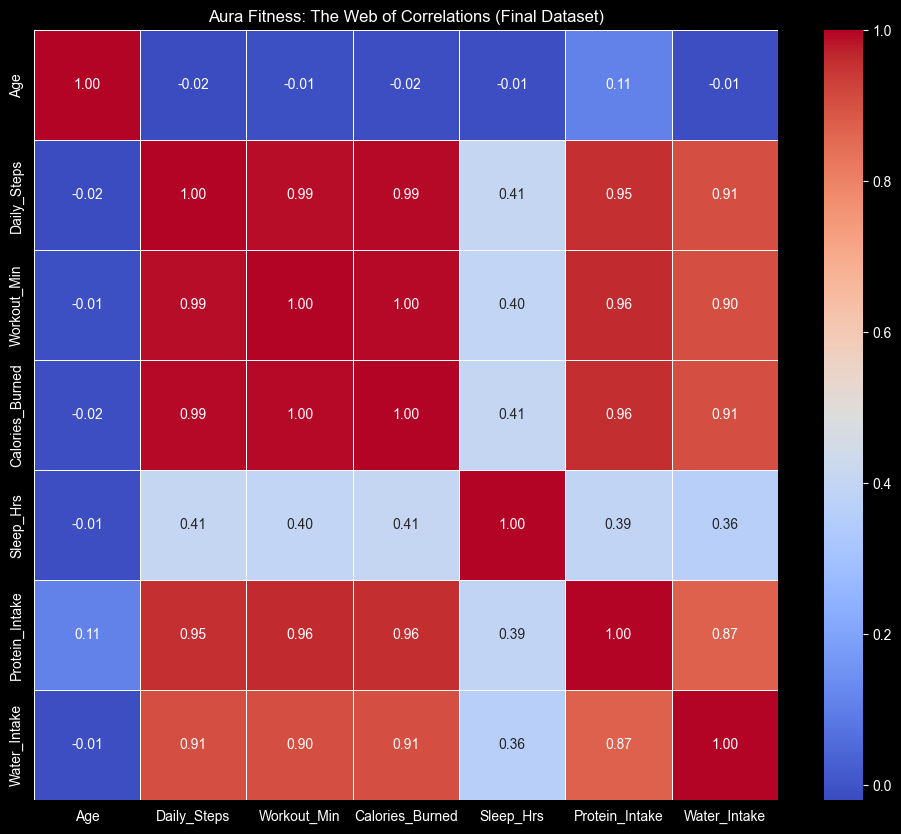

In [16]:
# සංඛ්‍යාත්මක දත්ත පමණක් වෙන් කර ගැනීම
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Heatmap එක ඇඳීම
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Aura Fitness: The Web of Correlations (Final Dataset)')
plt.show()

## 💼 Interview Question
- ප්‍රශ්නය: "EDA එකකදී දත්ත අතර සහසම්බන්ධතාවය (Correlation) බැලීමෙන් අපිට ලැබෙන ලොකුම ප්‍රයෝජනය කුමක්ද?"
- පිළිතුර: එමගින් අපිට AI Model එකක් හදද්දී වැදගත්ම වන Features (විචල්‍යයන්) හඳුනා ගන්න පුළුවන්. උදාහරණයකට, කැලරි දහනය අනාවැකි පළ කිරීමට 'Steps' සහ 'Workout_Min' යන දෙකම ඉතා වැදගත් බව Heatmap එකෙන් අපිට තහවුරු වෙනවා.

## 📊 Missing Data Visualization (The NaN Map)

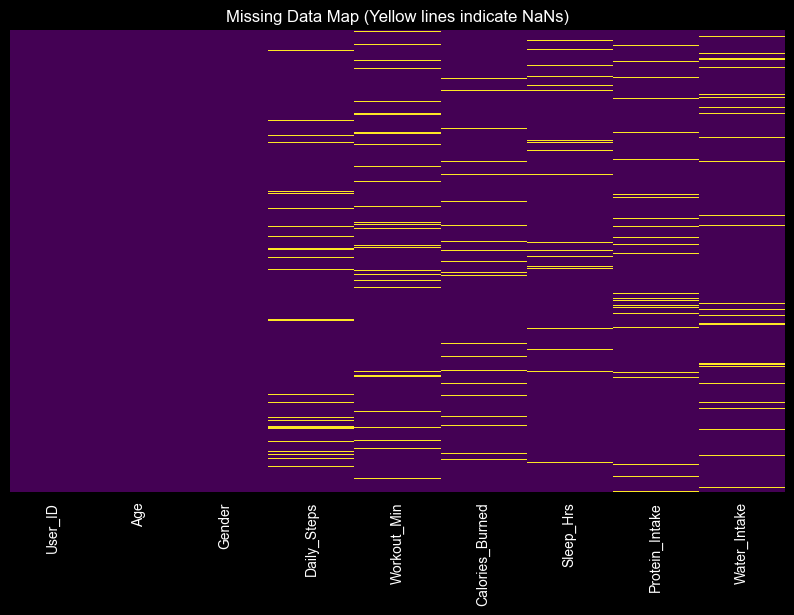

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Map (Yellow lines indicate NaNs)')
plt.show()

## 💼 Interview Question (Professional Standard)
- ප්‍රශ්නය: "සහසම්බන්ධතාවය (Correlation) ඉතා වැඩි විචල්‍යයන් දෙකක් (උදා: $0.99$) ඔයාගේ AI model එකක තියෙනවා නම්, එයින් ඇති විය හැකි  ගැටලුව කුමක්ද?"
- පිළිතුර: මෙයට Multicollinearity ලෙස හඳුන්වයි. විචල්‍යයන් දෙකක් එක හා සමානවම හැසිරෙනවා නම්, model එකට ඒ දෙකෙන් වඩා වැදගත් වන්නේ කුමක්දැයි හඳුනා ගැනීමට අපහසු විය හැක. එවැනි අවස්ථාවක බොහෝ විට එක් විචල්‍යයක් පමණක් තබා ගනී.